<a href="https://colab.research.google.com/github/kilianw/Microservices-With-Spring-Student-Files/blob/master/Week_1_PART_1_Simple_1D_Regression_QUESTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building intuition: Regression with one input feature

---

> DUPLICATE THIS COLAB TO START WORKING ON IT. Using File > Save a copy to drive.


## Instructions

1. We provide starter code and data to give your work a common starting point and structure. You must keep function signatures unchanged to support later usage and to ensure your project is graded successfully.
2. Read through the document and starting code before beginning your work. Understand the overall structure and goals of the project to ensure your implementation is efficient.


# Preliminaries of regression modeling

Some key components of any supervised learning task include:
* Dataset $\mathcal{D}$ with input/output pairs $(x,y) \in D$
* Function approximation model $f_\theta(x)→y$
* Loss (objective) function $\mathcal{L}_{\mathcal{D}}(f_\theta )$
* Training procedure to find $\underset{\theta \in \Theta}{\operatorname{argmin}} \mathcal{L}_\mathcal{D}(f_\theta )$

Generally in supervised machine learning we seek to _learn_ the best function approximation model $f_\theta(x)$ we can from the dataset $\mathcal{D}$. The loss function provides a mathematical definition of model performance on a given dataset, and the learning process finds a set of parameters $\theta$ that minimize the loss function. This same supervised learning framework is general enough to guide most of what we will cover in this course!

This project is designed to help you start building models prior to learning the underlying theory. If you'd like to dig deeper into the math underlying this project now, here are some reading links:
* [Elements of Statistical Learning](https://hastie.su.domains/Papers/ESLII.pdf). Chp 2
* Stanford CS229 [Supervised Learning Class Notes](https://cs229.stanford.edu/notes2021fall/cs229-notes1.pdf)


**Starting with linear regression**

Linear regression is a simple yet powerful modeling choice. Linear regression, often called least squares, models data by using a simple [line of best fit](https://www.mathsisfun.com/data/least-squares-regression.html) assumption. Let's see how a linear regression model looks using the supervised learning concepts above:

**Function approximation model: Linear regression**

$\hat{y} = f_\theta(x) = \theta_1 x_1 + \theta_2 x_2 + ...$

Our model chooses a linear form so that $\theta$ becomes a single coefficient for each input variable $x_i$.

**Loss function: Least squares**

$\mathcal{L}_{\mathcal{D}} (f_\theta(x)) = \sum_{i \in \mathcal{D}} (\hat{y}^{(i)} - y^{(i)})^2$

For each example, we compute the squared difference between the predicted and true values.

**Training procedure**

In this course, we won't cover much about different training/fitting procedures and how they work. For linear regression models, we have several training procedures which are fast, guaranteed to find the best model, and scale to large tasks.


# Building a first regression model

As a way to visualize more about training a model on a dataset, let's initially restrict our work to just a single input feature. This will allow directly plotting the data and resulting model predictions easily compared with the full, high-dimensional input features.

Let's create a toy dataset by sampling random values for the input $x$ and define the output $y$ to be $y = wf(x) + \epsilon$  where $w$ is a parameter we will learn, $\epsilon$ is a term for random noise, and $f$ is any function which could be linear or nonlinear. If we choose $f$ to be linear, then we are choosing $y$ to be a linear function of $x$ which matches the assumption of our _linear_ regression model. However, for this exercise, we will choose $f$ to be "almost" linear. In this case, a linear regression model will be still be effective but not perfect in modeling the data.

## Imports

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Creating a toy dataset

When creating a toy dataset, we pick some true parameters of the model (see `w_true` below). Using these parameters, we generate target variables `y` given some random inputs `x`. To put this in the bigger picture, we will later train a model (that does not know `w_true`) to learn weights `w_learned` that best capture the relationship between `x` and `y`. If the model succeeds, we should expect `w_learned` to be close to `w_true`.

In [ ]:
# parameters of toy dataset
n_examples = 500
w_true = 5.5

# uniformly sample inputs x. Output y is almost linear with respect to x.
dataset_X_1d = 5*(np.random.rand(n_examples,1) - 1)
noise_1d = 0.8*np.random.randn(n_examples,1)
f = lambda x: x * np.sin(2*x)  # nonlinear f
dataset_y_1d =  w_true * dataset_X_1d + f(dataset_X_1d) + noise_1d
dataset_y_1d = dataset_y_1d.ravel()

Now let's plot each example in our dataset as a point in 2-D using the input feature $x$ and the target $y$. We can see a pattern in how the target $y$ varies as a function of where the $x$ point is on the x-axis. This mapping is the regression function our model attempts to approximate from the training data. You can see it is not a perfect correlation between $x$ and $y$, precisely because we added noise in generating the data. This is done to reflect real world datasets, where correlation between input and output variables is never 100%.

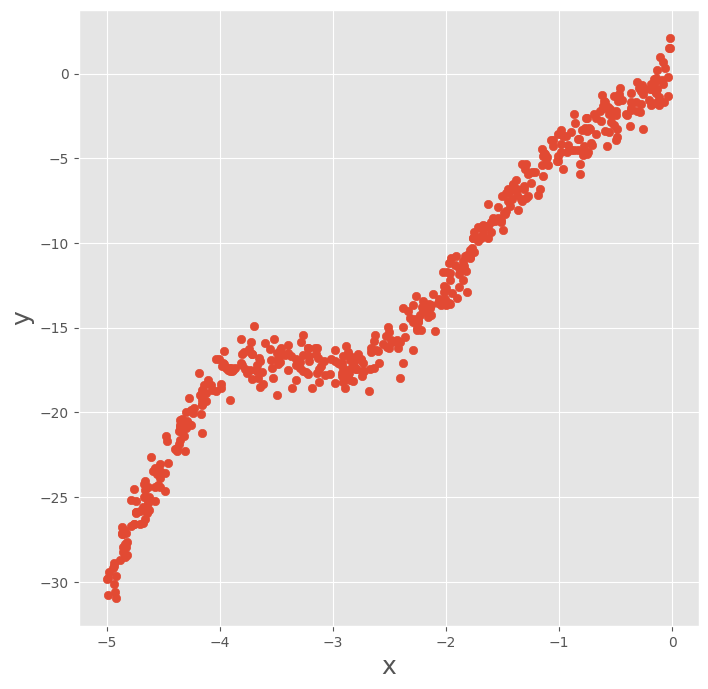

In [ ]:
plt.figure(figsize=(8, 8))
# dataset_X_1d has shape (500, 1) so index the 1st column
plt.scatter(dataset_X_1d[:,0], dataset_y_1d)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.show()

Notice the roughly linear relationship between `x` and `y`. You can still see the effects of a small sinusoid added in the data generation process, but the effects of this nonlinearity appear small enough that a linear regression model should still be successful.

## Training/fitting the model


Now that we have this toy dataset, let's train a model! We will fit a simple linear regression model using the `scikit-learn` package. The documentation provides additional options and details. Below, we will declare a linear model and then fit the model to the training data. This will use the training data to find model weights that optimize the loss function. In the case, the loss function is the mean squared error.

In [ ]:
from sklearn.linear_model import LinearRegression

## fit basic linear model with scikit
regr_1d = LinearRegression()
# this command trains (fits) the model using the dataset passed in
regr_1d.fit(dataset_X_1d, dataset_y_1d)

LinearRegression()

Since our model has only a single weight, we can view it directly in the model data structure. Compare this coefficient with `w_true` which we used in generating the outputs.



In [ ]:
regr_1d.coef_

array([5.19957861])

**Question**:

Why do you think this value is not exactly $5.5$ a.k.a. `w_true`? Hint: look back at the data generation process.

(Write your answer here)

## Generating predictions

Now let's generate model predictions for each example in the dataset, and visualize how the model predictions compare with the true values. The true values ${y}$ are shown with red points, and the predicted values $\hat{y}$ are shown with black points.

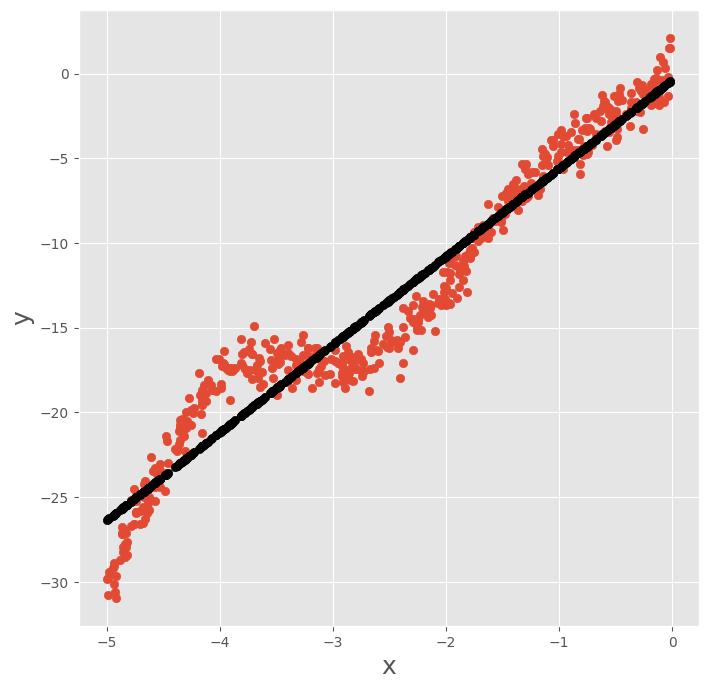

In [ ]:
# sklearn provides prediction function as a standard interface for models
pred_y_1d = regr_1d.predict(dataset_X_1d)

plt.figure(figsize=(8, 8))
plt.scatter(dataset_X_1d[:, 0], dataset_y_1d)
plt.scatter(dataset_X_1d[:, 0], pred_y_1d, color='black')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.show()

Q: Why are the predictions (black points) on a perfect line?

(Write your answer here)

# Improving with nonlinear regression models

We fit our linear regression model to the dataset, and because there is just a single input feature, we can easily identify steps for improving our regression model.

From the plot above, we can see that the linear model does a fairly good job of capturing the major trend in $x \rightarrow y$ relationship. However, there is some meaningful wiggle in the dataset which our linear model does not capture.

This situation is an instance of _underfitting_, where our model does not sufficiently "fit" our training dataset. Often underfitting can occur when a model makes strong assumptions about how to represent data (what we call _model bias_) compared with the amount of meaningful variation in the input dataset. When a dataset contains more variation than a model can capture, the model will _underfit_ the data.

In the example above, because the generating function was nonlinear but the model was linear, the dataset contained more variation than the model could capture, leading to underfitting.

To address underfitting, we can try a more expressive model. Rather than a regression model which assumes a linear function, let's try a different modeling choice -- decision tree regression.



In [ ]:
from sklearn.tree import DecisionTreeRegressor

regr_1d_dt = DecisionTreeRegressor(max_leaf_nodes=5)
regr_1d_dt.fit(dataset_X_1d, dataset_y_1d)
pred_y_1d_dt = regr_1d_dt.predict(dataset_X_1d)

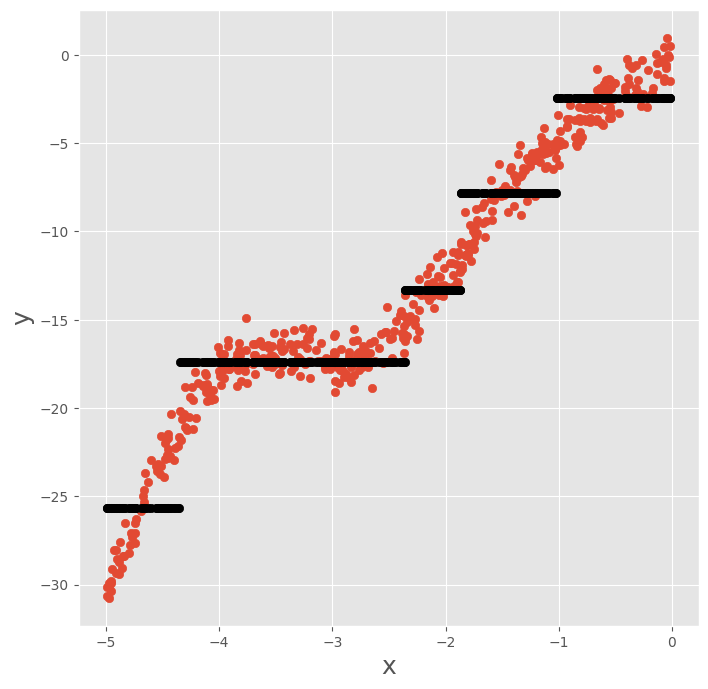

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(dataset_X_1d[:, 0], dataset_y_1d)
plt.scatter(dataset_X_1d[:, 0], pred_y_1d_dt, color='black')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.show()

With this new model, we see our predicted points certainly do not form a straight line! This model partitions the input space $x$ and keeps a local estimate of the $y$ value for each region of the partitioned space. On our plot this appears as large "steps" with some outlier areas captured by the model as well.

To better see what the model is doing, we can print out the "logic" of the trained decision tree below. You can see the model finding division points along the `x` variable in a nested manner --- almost like a nested set of `if` statements. As a result, the model essentially splits the x axis into different "groups" that it labels with different target values.

In [ ]:
from sklearn.tree import export_text
print(export_text(regr_1d_dt, feature_names=['x']))

|--- x <= -1.87
|   |--- x <= -4.35
|   |   |--- value: [-25.68]
|   |--- x >  -4.35
|   |   |--- x <= -2.36
|   |   |   |--- value: [-17.41]
|   |   |--- x >  -2.36
|   |   |   |--- value: [-13.29]
|--- x >  -1.87
|   |--- x <= -1.02
|   |   |--- value: [-7.84]
|   |--- x >  -1.02
|   |   |--- value: [-2.47]




The shape of our new predicted values might not match our intuition for the "right" way to approximate the data, so how can we compare two regression models?

# Regression error metrics

When evaluating how well a model meets a business need, or how two models compare with one another, often times model comparison starts with performance metrics. These measure performance on the prediction task relative to labeled data.

Let's start by defining a few common error metrics:

**Mean squared error (MSE)**: Given a dataset of size $n$, with predictions stored in an array $\hat{y}$ and the true output stored in an array $y$, the MSE is computed as $\frac{1}{n}\sum_{i=1}^n (y^{(i)} - \hat{y}^{(i)})^2$, where $y^{(i)}$ represents the label of the $i$-th example of the dataset. A lower MSE indicates a better predictor. An MSE of 0 indicates perfectly matching each $y$ value, i.e. $y^{(i)} = \hat{y}^{(i)}$ for all $i$.

**$R^2$ regression score function (coefficient of determination)**: This metric measures the "amount" of variation in the output $y$ that is explained by the model. $R^2$. is computed as the $1 - \frac{\sum_{i=1}^n (y^{(i)} - \hat{y}^{(i)})^2}{\sum_{i=1}^n (y^{(i)} - \bar{y})^2}$ where $\bar{y} = \frac{1}{n}\sum_{i=1}^n y^{(i)}$, the mean over all outputs. A higher $R^2$ is better. A score of 1 indicates the predicted and actual values are perfectly correlated, and the model explains all the variation in the dataset.

**Question**:

What does a negative $R^2$ value mean?

(Write your answer here)

## Task: Implement MSE and $R^2$


In [ ]:
# TASK: Implement MSE and R^2 as functions.

def mean_squared_error(y, y_hat):
  #############################
  #### YOUR CODE GOES HERE ####

  #############################

def r2_score(y, y_hat):
  #############################
  #### YOUR CODE GOES HERE ####

  #############################

In [ ]:
# Run metrics code on two model predictions
print("[ours] Linear: mean squared error: %f R^2: %.2f" % (mean_squared_error(dataset_y_1d, pred_y_1d), r2_score(dataset_y_1d, pred_y_1d)))
print("[ours] Nonlinear: mean squared error: %f R^2: %.2f" % (mean_squared_error(dataset_y_1d, pred_y_1d_dt), r2_score(dataset_y_1d, pred_y_1d_dt)))

In [ ]:
# Check that your implementation matches with scikit-learn
from sklearn.metrics import mean_squared_error, r2_score
print("[scikit-learn] Linear: mean squared error: %f R^2: %.2f" % (mean_squared_error(dataset_y_1d, pred_y_1d), r2_score(dataset_y_1d, pred_y_1d)))
print("[scikit-learn] Nonlinear: mean squared error: %f R^2: %.2f" % (mean_squared_error(dataset_y_1d, pred_y_1d_dt), r2_score(dataset_y_1d, pred_y_1d_dt)))

Based on both MSE and R^2, the nonlinear model fits the dataset better than our initial linear model. We would expect the nonlinear model to make fewer/smaller mistakes on this task because it's a better fit to the data.

While in 1-D we can visually inspect the mismatch between the dataset and the models' approximation, on larger ML tasks we will rely more on metrics and best practices to make choices about comparing and improving models.

## Generalization and development sets


So far we have fit our model using all examples in our toy dataset. This is fine for building intuitions about model fitting, but it avoids a key question in machine learning -- how well does a model _generalize_ to new data? Ultimately what we care about is that the model does well in deployment, not on the training data.

ML models will typically be applied to unseen data, so as a best practice, we withhold part of our full data as a _development_ set (dev set). We do not use this set to fit the model. Instead, we use it only to evaluate performance as an approximation to unseen data.

Note: A _test_ set is distinct from a dev set. A test set should be held out and used infrequently for a true measure of performance on unseen data. A dev set is often used to repeatedly evaluate performance during ML system development.

In [ ]:
# NOTE: we should keep the same `w_true` (data generation process) for both training and dev sets.
n_test_examples = 500

# (almost) identical generation process to training
# Whereas the training set samples x points from U(-1, 0), we sample x points
# for the dev set from U(0, 1).
dev_X_1d = np.random.rand(n_test_examples,1)
dev_noise_1d = 0.01*np.random.randn(n_test_examples,1)
dev_y_1d = w_true * f(dev_X_1d) + dev_noise_1d
dev_y_1d = dev_y_1d.ravel()

### Task: Compute and plot development set performance

Similar to what we did to the training dataset above, let's
1. Make predictions on the dev set using both the linear model and the nonlinear model.
2. Make a Matplotlib figure with two subfigures. In both subfigures, plot the training dataset in red points and dev dataset in blue points. In the first subfigure, plot the predictions of the linear model in black. In the second figure, plot the predictions of the nonlinear model in black.
3. Compute MSE and $R^2$ metrics on the dev set (rather than the training set).

In [ ]:
# Predictions on dev set
# FILL ME OUT
dev_pred_y_1d = regr_1d.predict(dev_X_1d)
dev_pred_y_1d_dt = regr_1d_dt.predict(dev_X_1d)

# Plot train vs dev on separate plots
fig, axs = plt.subplots(2, figsize=(8, 12))

#############################
#### YOUR CODE GOES HERE ####

#############################


Q: What do you notice about the performance of the more powerful nonlinear model on the dev set compared to the training set?

(Write your answer here)

# Exploring model capacity

One way we might hope to improve the generalization performance of our model is by changing the model's _representational capacity_ -- the ability of the model to correctly fit patterns in our training set. Our decision tree regression model allows us to directly alter some aspects of representational capacity by changing the number of free parameters in the model.


The `max_leaf_nodes` parameter specifies the maximum number of input partitions (step functions) the model will use to approximate the data. More nodes means that the model can create more specific partitions over the input features. Too many nodes, however, means that the decision tree could "overfit" to the training dataset, therefore doing poorly on a dev set.


## **Task: Try several versions of the decision tree model**


Try several values $[2,5,10,15,20,25,30]$ for `max_leaf_nodes`.  

Report MSE on train and dev sets using your `mean_squared_error` function. What `max_leaf_nodes` value produced the lowest MSE on the development set?


In [ ]:
# fit a DecisionTreeRegression model with different settings
#############################
#### YOUR CODE GOES HERE ####

#############################

## **Task: Plot and compare model predictions**
Plot model predictions and ground truth for different settings of `max_leaf_nodes` including the lowest dev set MSE model. What differences can you observe? Might you prefer a model which is not the lowest MSE model on the training set?

In [ ]:
# Plot predictions of your best model and 2 others
#############################
#### YOUR CODE GOES HERE ####

#############################

# We don't see very many differences between the different max_leaf_nodes.
# There is a bit less overfitting with smaller max_leaf_nodes (less expressive
# model), where the prediction is closer to the mean.
#
# In this case, I would prefer the linear model (black) which generalizes
# much better.
#
# I might prefer a model with higher MSE if I care about the training set more
# i.e. i care about the performance in -1 to 0 range, versus 0 to 1 range.

# Conclusion and next steps

Great work! In this session, you got a to try a few different models on a simple regression problem. We introduced the concepts of underfitting, overfitting, evaluation metrics, and hyperparameter tuning with a dev set. Next, we will work on regression problems in a higher dimensional setting.

# Project session: Adding outliers

Add some outlier examples to the training set. Then fit regression models with MSE and compare with our original model

In [ ]:
extra_X = np.concatenate((-4*np.ones((10,1)), -0.25*np.ones((10,1))))
extra_X = extra_X + np.random.randn(*extra_X.shape)
new_X = np.concatenate((dataset_X_1d, extra_X))

extra_y = np.concatenate((1*np.ones(10), -35*np.ones(10)))
new_y = np.concatenate((dataset_y_1d, extra_y))

In [ ]:
plt.figure(figsize=(8, 8))
# dataset_X_1d has shape (500, 1) so index the 1st column
plt.scatter(new_X[:,0], new_y)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.show()

In [ ]:
regr_out_l2 = LinearRegression()
# this command trains (fits) the model using the dataset passed in
regr_out_l2.fit(new_X, new_y)
pred_out_l2 = regr_out_l2.predict(new_X)

plt.figure(figsize=(8, 8))
plt.scatter(new_X[:, 0], new_y)
plt.scatter(new_X[:, 0], pred_out_l2, color='yellow')
plt.scatter(dataset_X_1d[:, 0], pred_y_1d, color='black')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.show()

**What are some real applications where slight shifts in a model could have serious impacts?**

**How might a small number of concentrated errors arise in a data collection / labeling process?**

(Write your answer here)